In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# drop index
df = df.drop(columns="Unnamed: 0", axis=0)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


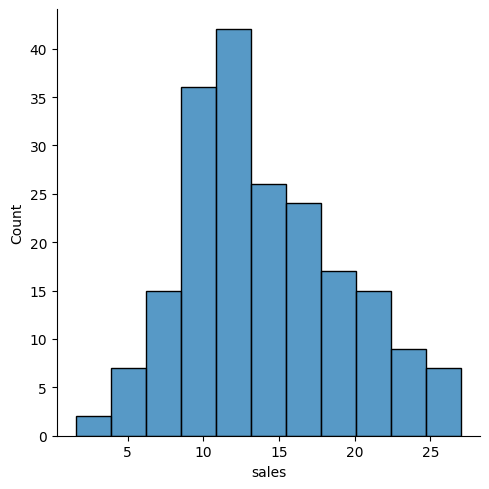

In [8]:
sns.displot(df.sales)

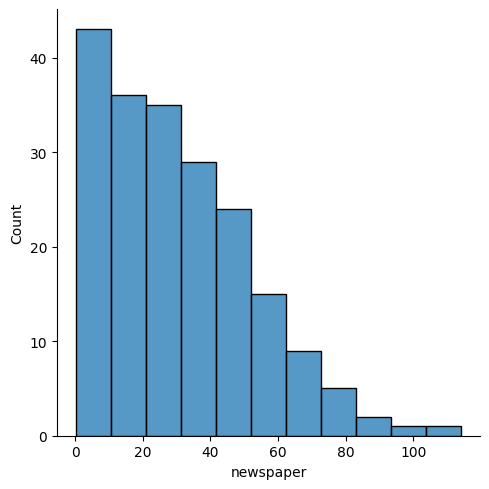

In [9]:
sns.displot(df.newspaper)

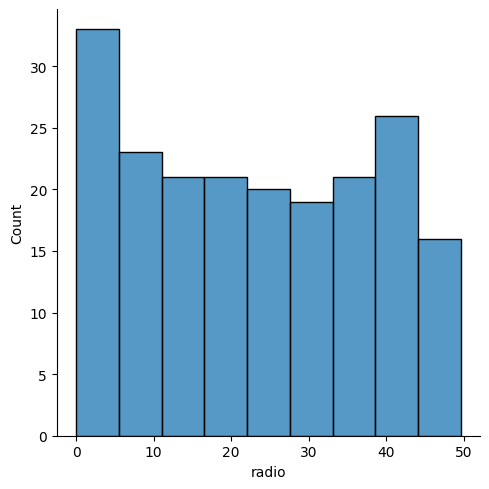

In [10]:
sns.displot(df.radio)

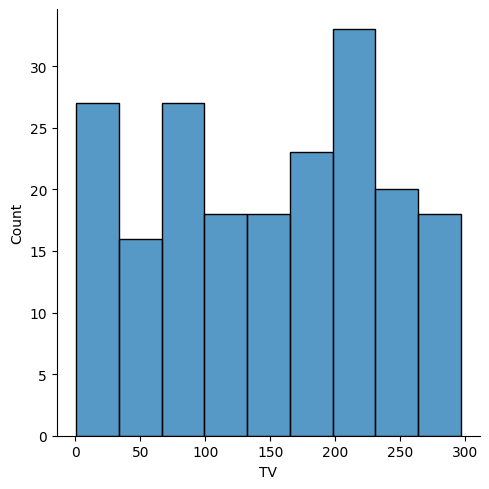

In [11]:
sns.displot(df.TV)

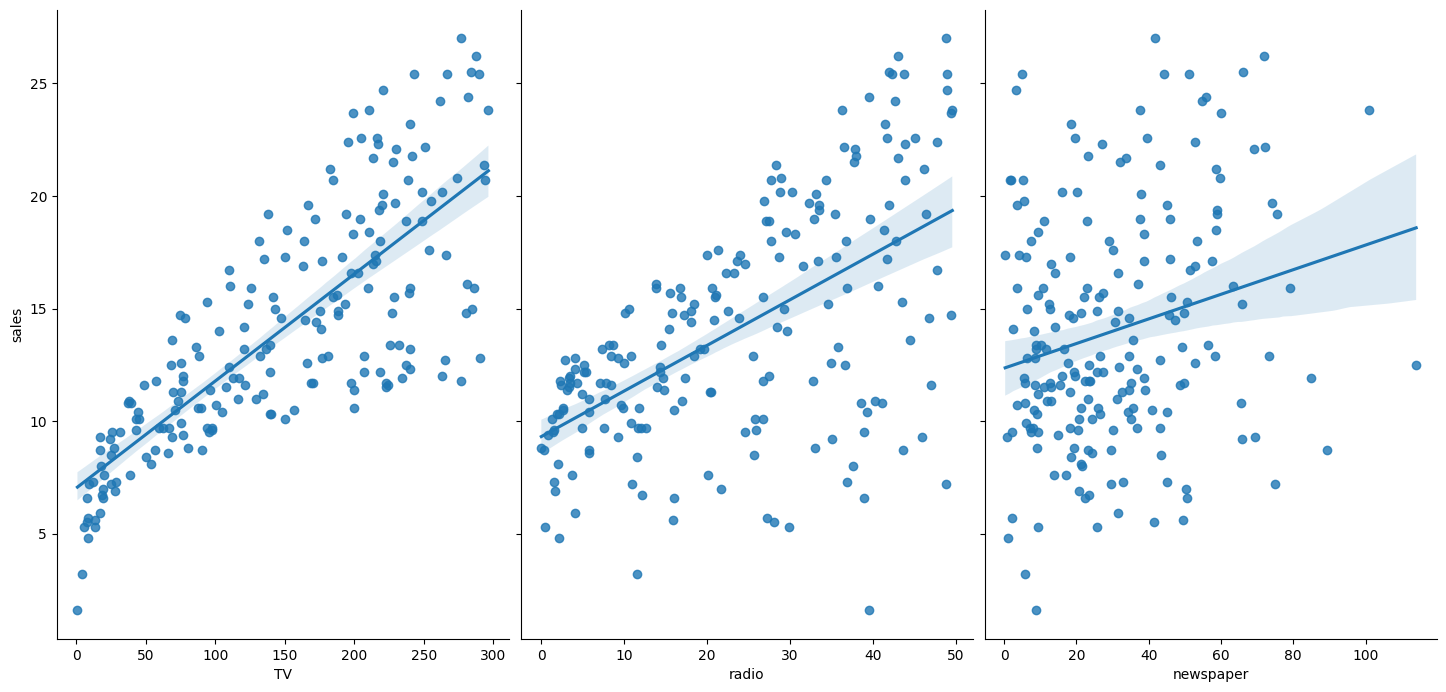

In [12]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=7, aspect=0.7, kind='reg')

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

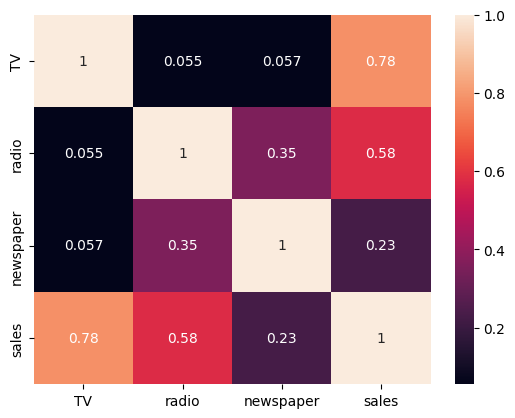

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [15]:
abs(corr_matrix['sales']).sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [16]:
X = df[["TV", "radio", "newspaper"]]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X.shape

(200, 3)

In [19]:
y = df['sales']
type(y)

pandas.core.series.Series

In [20]:
y.shape

(200,)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
X_train.shape

(150, 3)

In [23]:
y_train.shape

(150,)

In [24]:
X_test.shape

(50, 3)

In [25]:
y_test.shape

(50,)

In [26]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [27]:
LR.intercept_

2.8769666223179318

In [28]:
LR.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [29]:
result = LR.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9156213613792231


In [30]:
y_pred = LR.predict(X_test)

In [31]:
from sklearn import metrics
print(f"MAE : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2 : {metrics.r2_score(y_test, y_pred)}")

MAE : 1.0668917082595215
MSE : 1.9730456202283397
RMSE : 1.404651423032896
R2 : 0.9156213613792231
